Logistic Regression Accuracy: 0.9590
Gradient Boosting Accuracy: 0.9701


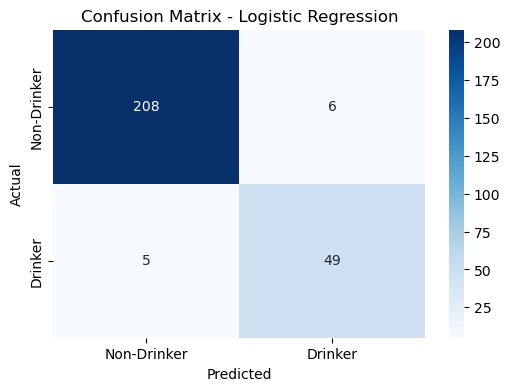

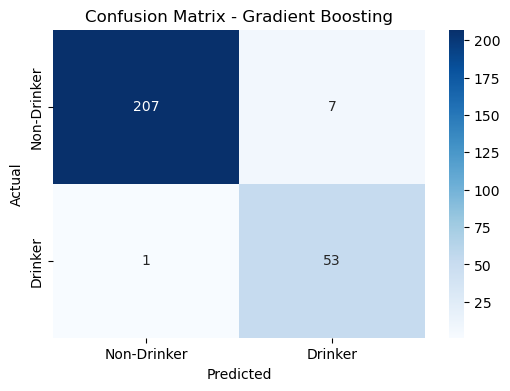

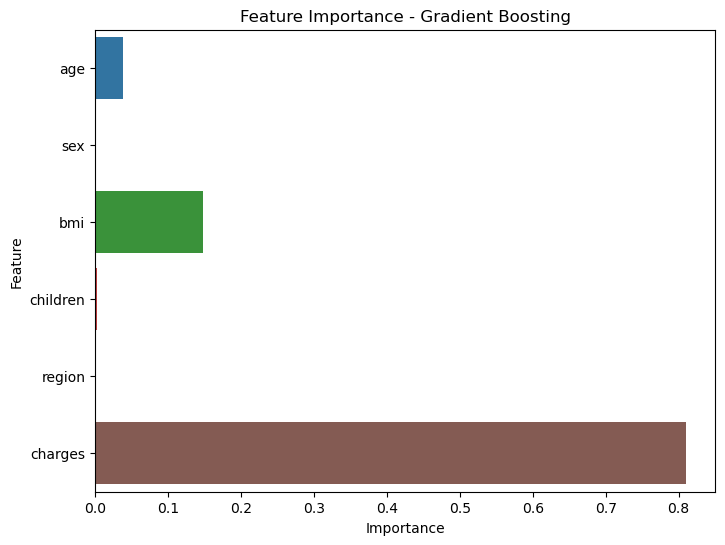

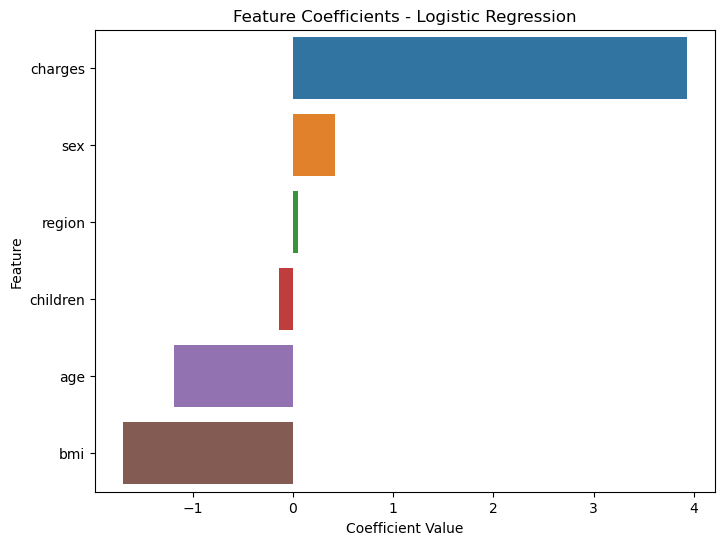

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('MedicalData.csv')
for col in ['sex', 'region', 'drinker']:
    data[col] = LabelEncoder().fit_transform(data[col])
data[['age', 'bmi', 'charges']] = StandardScaler().fit_transform(data[['age', 'bmi', 'charges']])

X = data.drop('drinker', axis=1)
y = data['drinker']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "conf_matrix": confusion_matrix(y_test, y_pred)
    }
    print(f"{name} Accuracy: {results[name]['accuracy']:.4f}")

# Plot confusion matrices
for name, result in results.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(result["conf_matrix"], annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Drinker', 'Drinker'], yticklabels=['Non-Drinker', 'Drinker'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.savefig(f"confusion_matrix_{name.replace(' ', '_').lower()}.png")
    plt.show()

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=models["Gradient Boosting"].feature_importances_, y=X.columns)
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.savefig("feature_importance_gb.png")
plt.show()

# Plot Logistic Regression coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': models["Logistic Regression"].coef_[0]
}).sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title("Feature Coefficients - Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.savefig("feature_coefficients_logistic.png")
plt.show()
